In [267]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import seaborn as sns
from sklearn import (pipeline,preprocessing,compose,linear_model,model_selection,neighbors,ensemble,tree,neural_network,model_selection)
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [225]:
df=pd.read_csv("diabetes.csv")

In [226]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [228]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

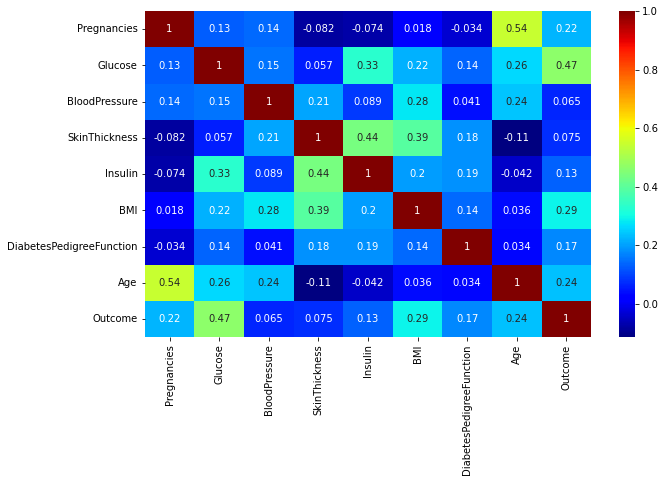

In [229]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="jet")

In [230]:
y= df["Outcome"]
X=df.drop(columns=["Outcome"])

In [231]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [232]:
sum(y)

268

In [233]:
df.info

<bound method DataFrame.info of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   5

In [234]:
#train test split

In [235]:
#Dört tane yeni değişken oluşturacağız. Bunlardan ilk ikisi bağımsız değişkenler matrisi için eğitim ve test, 
#diğer ikisi bağımlı değişken için eğitim ve test.

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=50)

#test_size parametresi ile test için ne kadar bir veri ayrılacak onu belirtiyoruz.
# Yukarıdaki 0.2 verinin % 25’sini test için ayır demek. Bu parametreyi atamakla aslında train_size’ı da dolaylı olarak 0.75 yapmış oluyoruz.   
#Örneklem için bir random_state değeri belirliyoruz. Aynı sonuçlar için aynı rakamlar kullanılması tavsiye edilir.                                               

In [236]:
X_train.shape

(576, 8)

In [237]:
y_train.shape

(576,)

In [238]:
loj_model= LogisticRegression(solver="liblinear") ## c, penalty=l1,l2 farklı optimizasyonlar sağlıyor 
# solver : {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, default='lbfgs'
# Küçük veri kümeleri için 'liblinear' iyi bir seçimdir, oysa 'sag' ve 'saga' büyük olanlar için daha hızlıdır.
## optimizasyon için argümanları kullanıyrouz..


In [239]:
loj_model.fit(X_train,y_train) # öğrenmenin gerçekleştiği yerler..train leri x ve y den alarak eğitiypruz...
#Böylelikle basit lineer nesnemizi oluşturmuş ve modelimizi eğitmiş oluyoruz. 
# Alın işte size makine (regressor) öğrenmesi (fit) :)

LogisticRegression(solver='liblinear')

In [240]:
loj_model.score(X_train,y_train)### eğitim sonucu train score daha çok çıkar...modelin verisiyle yapılan eğitimi 
# test score daha küçük çıkar genelde.. train score modelde görülen alışık olduğu değerler..test score ise alışılmamış değerleden alınırak eğtilen score..
#  train test; neden 100 olmaz train eğitimi skoru: genel cevap veriliyor..ezberleme yapmak istemeyen bir sistem ..geneleleyebilen bir sistem..underfit ve overfit..overfit değil underfittir..
#TRAİN ACCURCY SCORE BURASI

0.796875

In [241]:
loj_model.score(X_test,y_test)  ## burada test ediyoruz daha az bir kısım buraası yalnız
## BU KISIM TEST ACCURCY SCORE

#Doğruluk oranı harika, ancak makine öğrenimi modellerimizin
#daha önce görmediğimiz yeni verilerde yaptığı hatalar hakkında bize hiçbir şey söylemiyor.

0.734375

In [242]:
y_pred=loj_model.predict(X_test) 

y_pred
. 


array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [243]:
confusion_matrix(y_test,y_pred) 



array([[109,  13],
       [ 38,  32]], dtype=int64)

In [244]:
from sklearn.metrics import precision_score


precision_score(y_test,y_pred)

0.7111111111111111

In [245]:
from sklearn.metrics import recall_score


recall_score(y_test,y_pred)
#Tıbbi tanıda, geri çağırma skoru son derece yüksek olmalıdır, aksi takdirde 
# daha fazla sayıda yanlış negatifin hastaların yaşamı için ölümcül olduğu kanıtlanacaktır. 
# Daha düşük hatırlama puanı, daha büyük bir yanlış negatif anlamına gelir, 
# bu da esasen pozitif olan bazı hastaların yanlış negatif olarak adlandırıldığı anlamına gelir. 
# Bu, hastaların hastalıktan muzdarip olmadıklarından emin olacakları ve bu nedenle başka bir işlem yapmayacağı anlamına gelir.
#  Bu, hastalığın ağırlaşmasına ve yaşam için ölümcül olmasına neden olabilir.

#  diğer örnek::::> Bir üretim sisteminde, sistem bakımı ihtiyacını öngören makine öğrenimi modelleri için
#  daha yüksek bir recall puanı istersiniz. 
# Daha düşük bir recall , makinelerin çalışmama süresine ve dolayısıyla genel olarak işletmeyi etkilemesine neden olabilecek
#  daha yüksek bir yanlış negatif anlamına gelir.

0.45714285714285713

In [246]:
from sklearn.metrics import f1_score


f1_score(y_test,y_pred)

0.5565217391304348

In [247]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.89      0.81       122
           1       0.71      0.46      0.56        70

    accuracy                           0.73       192
   macro avg       0.73      0.68      0.68       192
weighted avg       0.73      0.73      0.72       192



In [248]:
#CROSS VALİDATE uygulanması


In [249]:
from sklearn.model_selection import cross_validate


cv=cross_validate(estimator=loj_model,cv= 10 ,X=X,y=y ,n_jobs=-1, return_train_score=True)

c:\Users\eneso\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [250]:
cv

{'fit_time': array([0.02025318, 0.01951647, 0.01680994, 0.01608515, 0.0255332 ,
        0.01652861, 0.01903272, 0.01709795, 0.01158524, 0.00906086]),
 'score_time': array([0.005723  , 0.00568199, 0.00546145, 0.00695181, 0.00550795,
        0.00451589, 0.0060029 , 0.0086267 , 0.00404215, 0.00438166]),
 'test_score': array([0.74025974, 0.75324675, 0.79220779, 0.72727273, 0.74025974,
        0.74025974, 0.81818182, 0.79220779, 0.73684211, 0.82894737]),
 'train_score': array([0.78581766, 0.78147612, 0.77568741, 0.77134588, 0.7829233 ,
        0.78437048, 0.77568741, 0.77279305, 0.78901734, 0.7716763 ])}

In [251]:
cv["score_time"].mean()

0.005689549446105957

In [252]:
cv["test_score"].mean()

0.7669685577580314

In [253]:
cv["train_score"].mean()

0.7790794944078699

In [254]:

loj_model.score(X_train, y_train)   

0.796875

### Classificaiton and Regression Tree


In [255]:
cart_model = DecisionTreeClassifier().fit(X_train,y_train)

In [256]:
cart_model

DecisionTreeClassifier()

In [257]:
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
                       
criterion => dallanma ilgili kriterdir.
max_features => max degisken sayisidir.

SyntaxError: invalid syntax (3873481160.py, line 8)

In [ ]:
cart_model.score(X_train,y_train)

1.0

In [ ]:
cart_model.score(X_test,y_test)

0.7083333333333334

In [ ]:
y_pred = cart_model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7083333333333334

## Model Tunning

In [ ]:
cart= DecisionTreeClassifier()

In [ ]:
cart_params = {'criterion' : ["gini", "entropy"],
               'min_samples_leaf':[2,5,8,10,20],
               "max_depth": [1,3,5,8,10],            # max derinlik
              "min_samples_split": [2,3,5,10,20,50]}

In [ ]:
cart_cv_model = GridSearchCV (cart,cart_params, cv = 3, n_jobs=-1, verbose=2).fit(X_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


In [ ]:
cart_cv_model.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'min_samples_leaf': 8,
 'min_samples_split': 3}

In [ ]:
cart_tuned = DecisionTreeClassifier(criterion = 'gini',max_depth = 5,min_samples_leaf = 8,min_samples_split= 3).fit(X_train, y_train)

In [ ]:
y_pred=cart_tuned.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.7604166666666666

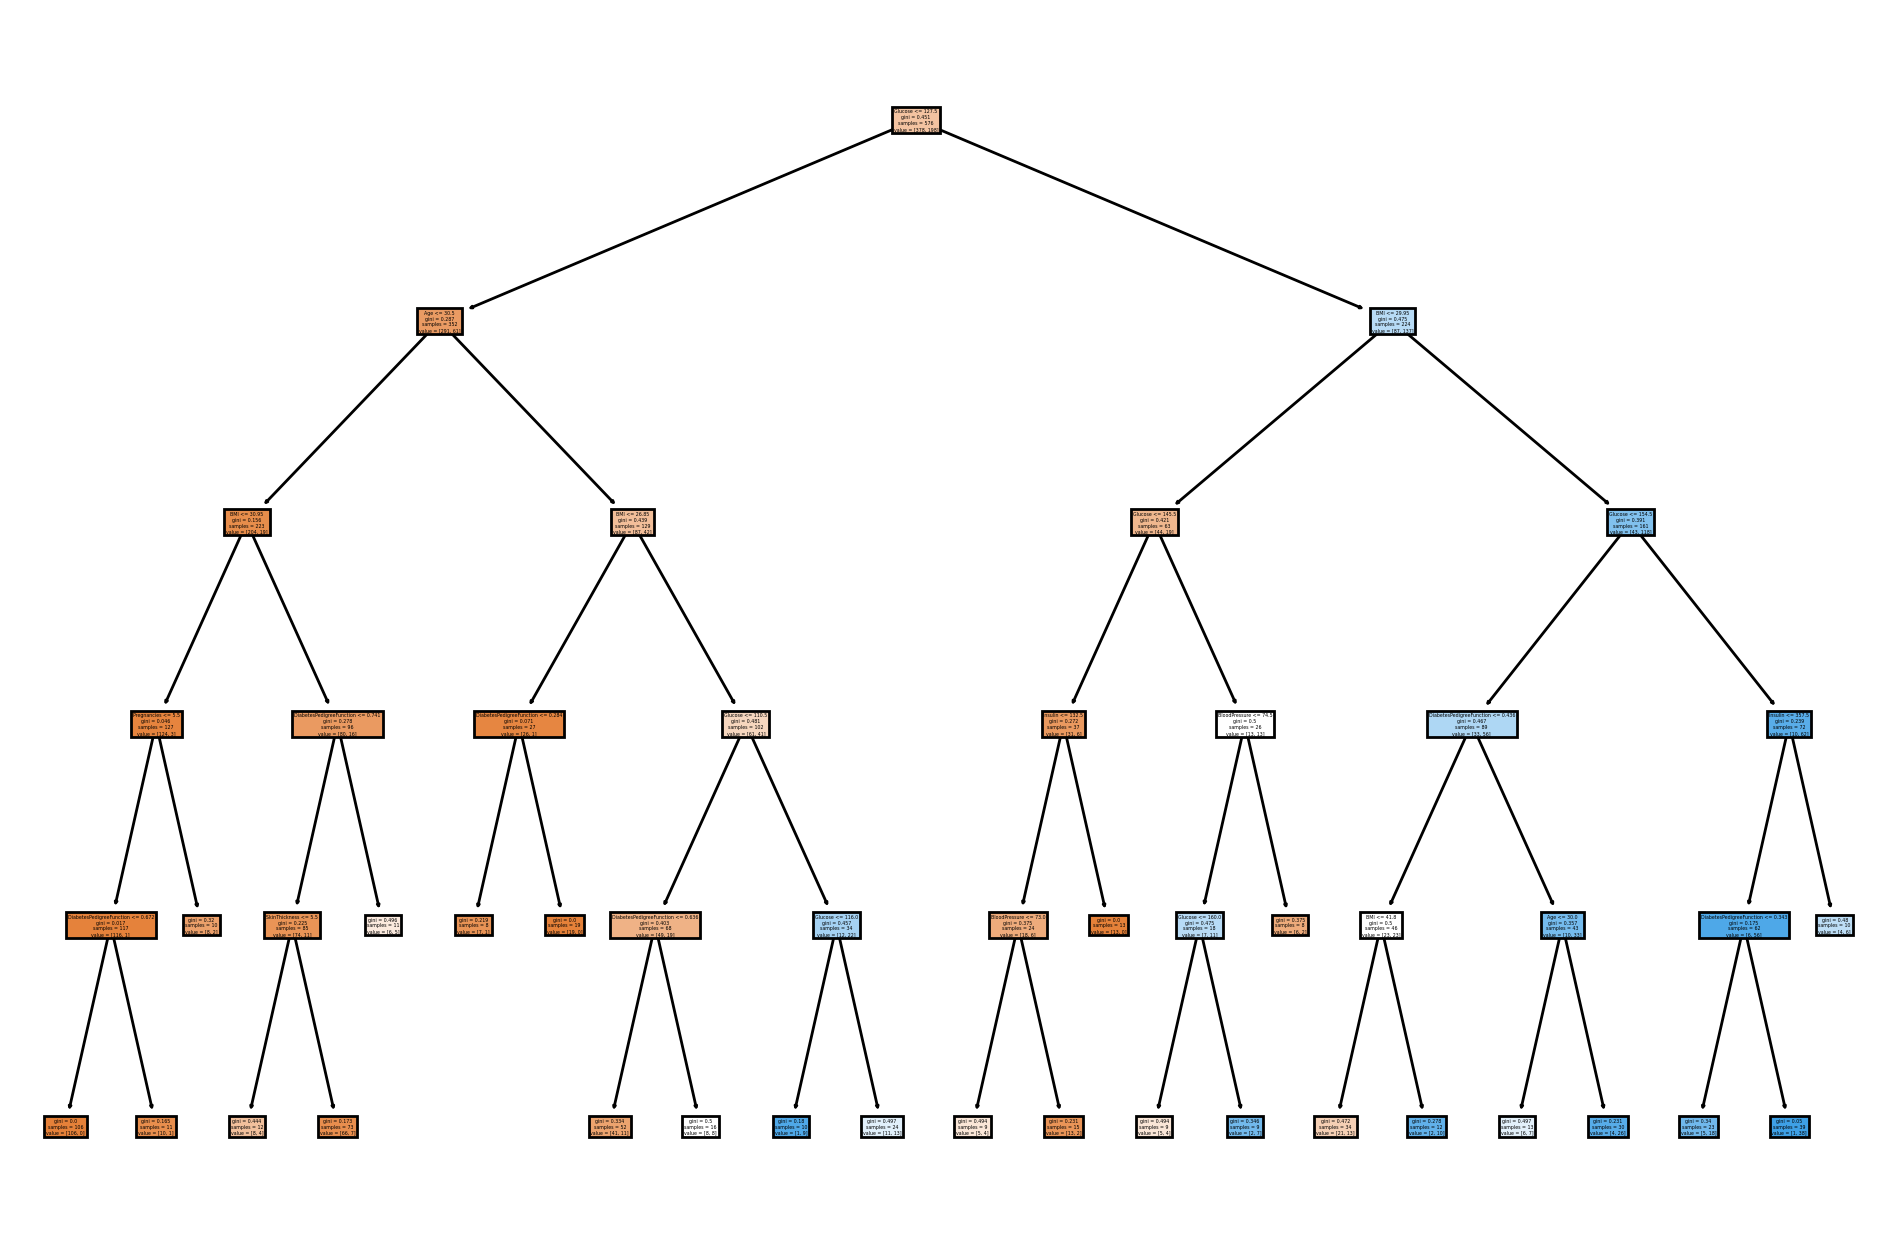

In [265]:
plt.figure(figsize= (12,8),dpi=(200))
plot_tree(cart_tuned, feature_names=X.columns, filled=True);


In [264]:
from sklearn.tree import plot_tree
